<a href="https://colab.research.google.com/github/harrycslau/AI4Teachers-assignments/blob/master/FML1w2_mnist-multi-class_logit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>

# Build a simple classifier for the MNIST dataset

To build our model we need to do a few steps:
- Download the MNIST dataset with consist of labeled handwritten images (28x28 px).
- Construct 10 logistic regression models for the one vs rest classification.
- Train our model and then test and validate how well we did.

#  0. Load our packages

In [1]:
import numpy as np
import pandas as pd
# import keras

from sklearn.model_selection import train_test_split

%matplotlib inline
import matplotlib.pyplot as plt

# 1. Load the data
The MNIST database is available as a dataset in Keras. Note: the data comes on a single channel, as opposed to the 3-channel presentation in the lectures. This will lead to having slightly fewer parameters in the model.

In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical

img_rows, img_cols = 28, 28
num_classes = 10

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('We have %2d training pictures and %2d test pictures.' % (x_train.shape[0],x_test.shape[0]))
print('Each picture is of size (%2d,%2d)' % (x_train.shape[1], x_train.shape[2]))

We have 60000 training pictures and 10000 test pictures.
Each picture is of size (28,28)


# 2. Explore the data

It is always a good to do some data exploration before we start using it, find outliers, and decide if we need a preprocessing phase to uniform or augment it. And also to make sure that all the classes are covered by or more or less the same number of samples.

#### Display some images

In [3]:
def display_train_image(position):
    plt.figure(figsize=(1,1))
    plt.title('Example %d. Label: %d' % (position, y_train[position]))
    plt.imshow(x_train[position], cmap=plt.cm.gray_r)
    plt.show()
    plt.close()

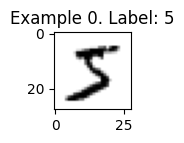

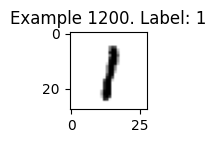

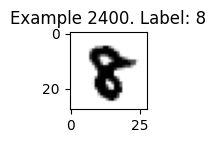

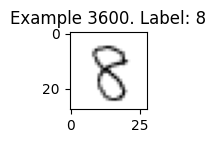

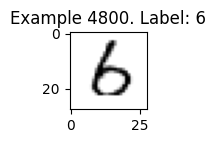

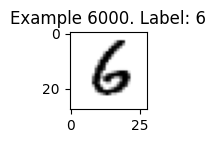

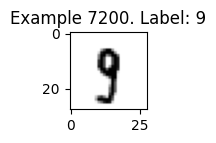

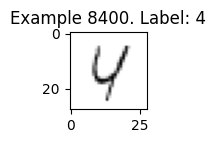

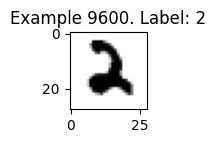

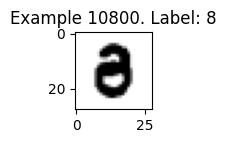

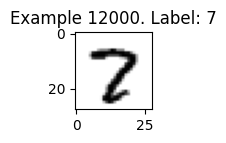

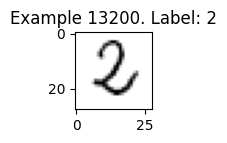

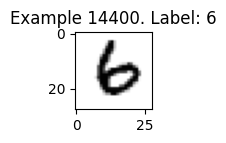

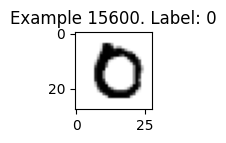

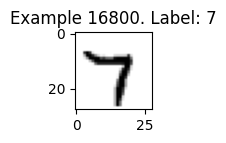

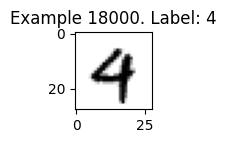

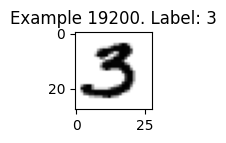

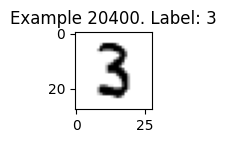

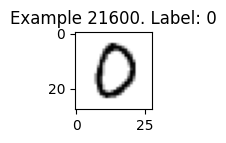

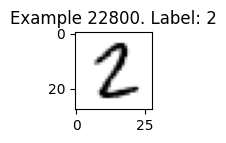

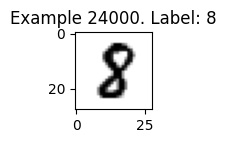

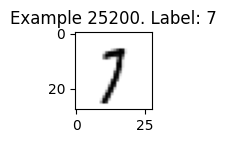

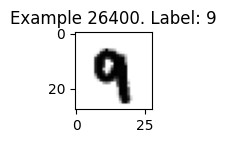

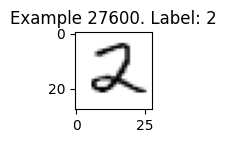

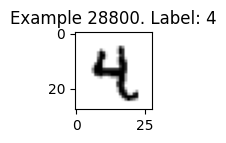

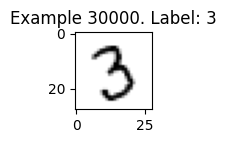

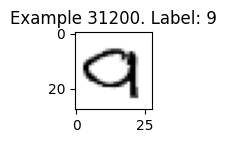

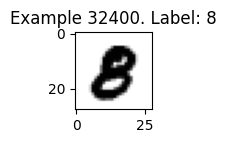

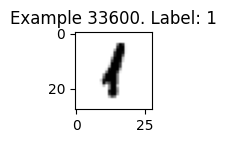

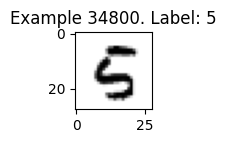

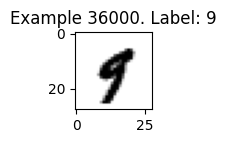

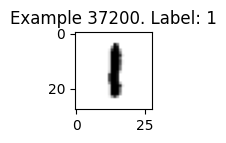

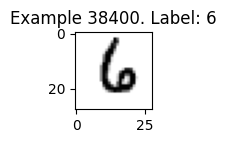

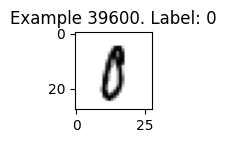

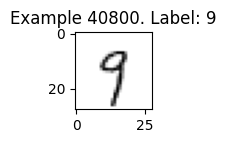

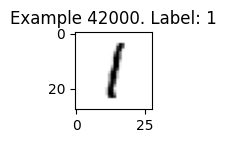

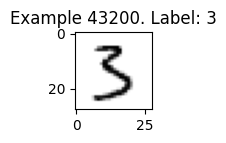

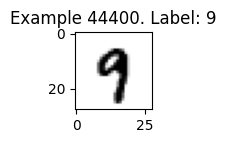

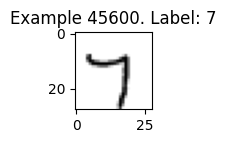

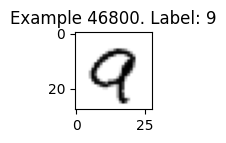

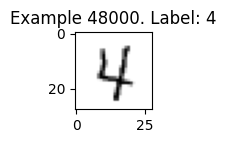

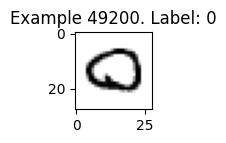

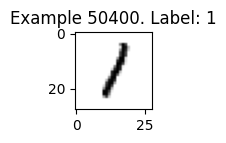

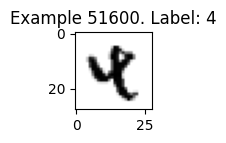

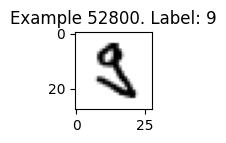

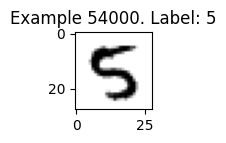

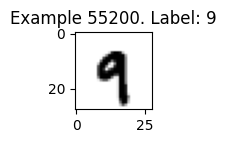

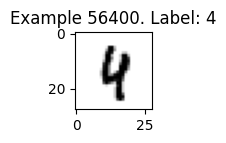

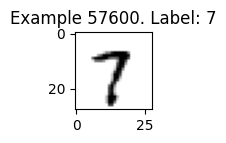

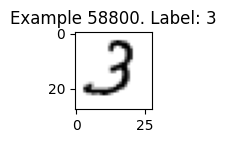

In [4]:
for i in range(50):
    display_train_image(1200*i)

#### Is the training data balanced?

In [5]:
y_train_count = np.unique(y_train, return_counts=True)
dataframe_y_train = pd.DataFrame({'Label':y_train_count[0], 'Count':y_train_count[1]})
dataframe_y_train

,Label,Count
0,0,5923
1,1,6742
2,2,5958
3,3,6131
4,4,5842
5,5,5421
6,6,5918
7,7,6265
8,8,5851
9,9,5949


We conclude that the data is balanced between the different labels. So we can continue with the modeling without extra manipulation of the dataset.

# 3. Data preprocessing

In [ ]:
# Reset the seed of the random number generator, for reproducibility purposes
np.random.seed(2023)

In [ ]:
# Split the training dataset into training and validation

x_train, x_valid, y_train, y_valid = train_test_split(x_train, 
                                                      y_train, 
                                                      test_size=0.2, 
                                                      random_state=2023, 
                                                      stratify=y_train
                                                     )

In [ ]:
# Check the result of the data split

print('# of training images:', x_train.shape[0])
y_train_count = np.unique(y_train, return_counts=True)
dataframe_y_train = pd.DataFrame({'Label':y_train_count[0], 'Train samples':y_train_count[1]})
print(dataframe_y_train.to_string(index=False))

print('# of validation images:', x_valid.shape[0])
y_valid_count = np.unique(y_valid, return_counts=True)
dataframe_y_valid = pd.DataFrame({'Label':y_valid_count[0], 'Valid samples':y_valid_count[1]})
print(dataframe_y_valid.to_string(index=False))

#### Scale the training data

In [ ]:
print("The training data has values in the interval [%d,%d]" % (x_train.min(),x_train.max()))

#### We decide to scale the data into [0,1] by dividing to 255.

In [ ]:
# Scale the data into the interval [0,1]
x_train = x_train/255

# Reshape the data so that each 28 x 28 picture is transformed into a 784-long vector
x_train=x_train.reshape(x_train.shape[0],-1)
print("Shape of the training data: ",x_train.shape)

# 4. Machine learning with logistic regression

#### Train a logistic regression model using a "one vs rest" model (indicated through the choice of the solver)
This trains internally 10 different binary classification models. For each datapoint, 10 predictions are generated, the one with the highest probability is selected as the prediction of the logistic regression model.

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='liblinear', max_iter=100, random_state=10)
clf = clf.fit(x_train, y_train)

In [ ]:
# Check the score on the training data

print("Score on training data: %.4f" % clf.score(x_train, y_train))

#### Check on the validation data 


### Q1: What is the score of the one vs. rest model on the validation data (2 decimals only)?

In [ ]:
# Your code here


In [ ]:
# Check the score on the validation data

print("Score on validation data: %.4f" % clf.score(x_valid, y_valid))

#### Check other metrics of the model

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred_valid = clf.predict(x_valid)
accuracy_valid = accuracy_score(y_pred_valid, y_valid)
f1_valid = f1_score(y_pred_valid, y_valid, average="weighted")

print("Accuracy on the validation data: %.4f" % accuracy_valid)
print("F1 Score on the validation data: %.4f" % f1_valid)


labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cm = confusion_matrix(y_valid, y_pred_valid, labels=labels)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
# print("The confusion matrix on the validation data:")
# disp.plot()

print("The confusion matrix on the validation data:")
print(cm)


#### Train now a logistic regression model for the entire 10-class classification problem (using a softmax function to select the prediction on a datapoint. 

(2025.01) No additional parameters need to be set for this setup. Multinomial is the current default option for LogisticRegression.

In [ ]:
clf2 = LogisticRegression(max_iter=100, random_state=10)
clf2 = clf2.fit(x_train, y_train)

### Q2: What is the score of the multi-class model on the validation data (4 decimals)?

In [ ]:
# Your code here



#### We noticed that the learning was stopped before it converged. Let's increase the number of iterations in the learning algorithm from 100 to 1000. 

#### Q3: What is the score of the better trained multi-class model on the validation data (4 decimals)?

In [ ]:
# Your code here



#### We now can select the final model. Take the one with the highest score on the validation data. 

### Q4: Which model did you select (one vs. rest or multi-class)?

#### Check the final model on the test dataset

In [ ]:
# Your code here



### Q5: What is the score of the final model on the test data (4 decimals)?

In [ ]:
# Your code here

